In [1]:
# Import all the important libraries
import numpy as np
import numba as nb 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib

from sys_pde_no_growth_Lmx1a_GRN import *

In [38]:
# System Params - Same for all the species
sys_params = np.zeros(2)
sys_params[0] = 2                   # Hill coefficient
sys_params[1] = 0.7                 # BMP(t=0)

# BMP
b_params = np.zeros(7)
b_params[0] = 0.01                     # a_b_s
b_params[1] = 8.26**sys_params[0]     # K_b_s (with exponent)
b_params[2] = 0.01                 # a_b_w
b_params[3] = 86.45**sys_params[0]       # K_b_w (with exponent)
b_params[4] = 2.21                    # a_b_l
b_params[5] = 100**sys_params[0]       # K_b_l
b_params[6] = 0.115                   # d_b

# BMP i
i_params = np.zeros(3)
i_params[0] = 0.572                      # a_i_s
i_params[1] = 0.779**sys_params[0]    # K_i_s
i_params[2] = 0.034                   # d_i

# pSmad
s_params = np.zeros(4)
s_params[0] = 0.159                   # a_s_b
s_params[1] = 0.3**sys_params[0]    # K_s_b
s_params[2] = 0.175**sys_params[0]     # K_s_i
s_params[3] = 1.44                   # d_s

# Lmx1a
l_params = np.zeros(5)
l_params[0] = 0.01                     # a_l_s
l_params[1] = 54.57**sys_params[0]    # K_l_s (with exponent)
l_params[2] = 15.8                     # a_l_w
l_params[3] = 6.95**sys_params[0]    # K_l_w (with exponent)
l_params[4] = 0.115                   # d_l

# Wnt
w_params = np.zeros(5)
w_params[0] = 0.218                 # a_w_l
w_params[1] = 1.15**sys_params[0]    # K_w_l (with exponent)
w_params[2] = 13.59                  # a_w_s
w_params[3] = 0.94**sys_params[0]  # K_w_s (with exponent)
w_params[4] = 0.125                   # d_w

In [39]:
# Define all the simulations params
sol_params = np.zeros(3)
sol_params[0] = 0.01 # dt 
sol_params[1] = 144/sol_params[0] # Total time, T
sol_params[2] = 1/sol_params[0] # Delta t (snapshot saving time)

In [40]:
# Get the initial conditions
b, i, s, l, w = create_IC_1(sys_params)

In [41]:
data_b_time, data_i_time, data_s_time, data_l_time, data_w_time = run_and_save_sys(b, i, s, l, w, 
                     b_params, i_params, s_params, l_params, w_params, 
                     sys_params, sol_params)

In [42]:
t_measured = np.array([ 0,   0.5,  0.75, 1.0,   2.0,  3.0,  4.0,  5.0,  6.0,  7.,   8.0,  24.0,  48.0,  56.0,  64.0,  67.0,  70.0,  72.0,  80.0,  96.0,  110,   126,   132,   144])
x2_measured = np.array([0.0, 0.68, 0.77, 1.283, 1.12, 1.84, 1.37, 1.29, 1.80, 1.03, 0.96, 0.012, 0.12,  0.40,  0.60,  0.7,   0.80,  0.90,  0.95,  1.00,  1.00,  1.00,  1.00,  1.00])
x2_measured /= np.max(x2_measured)

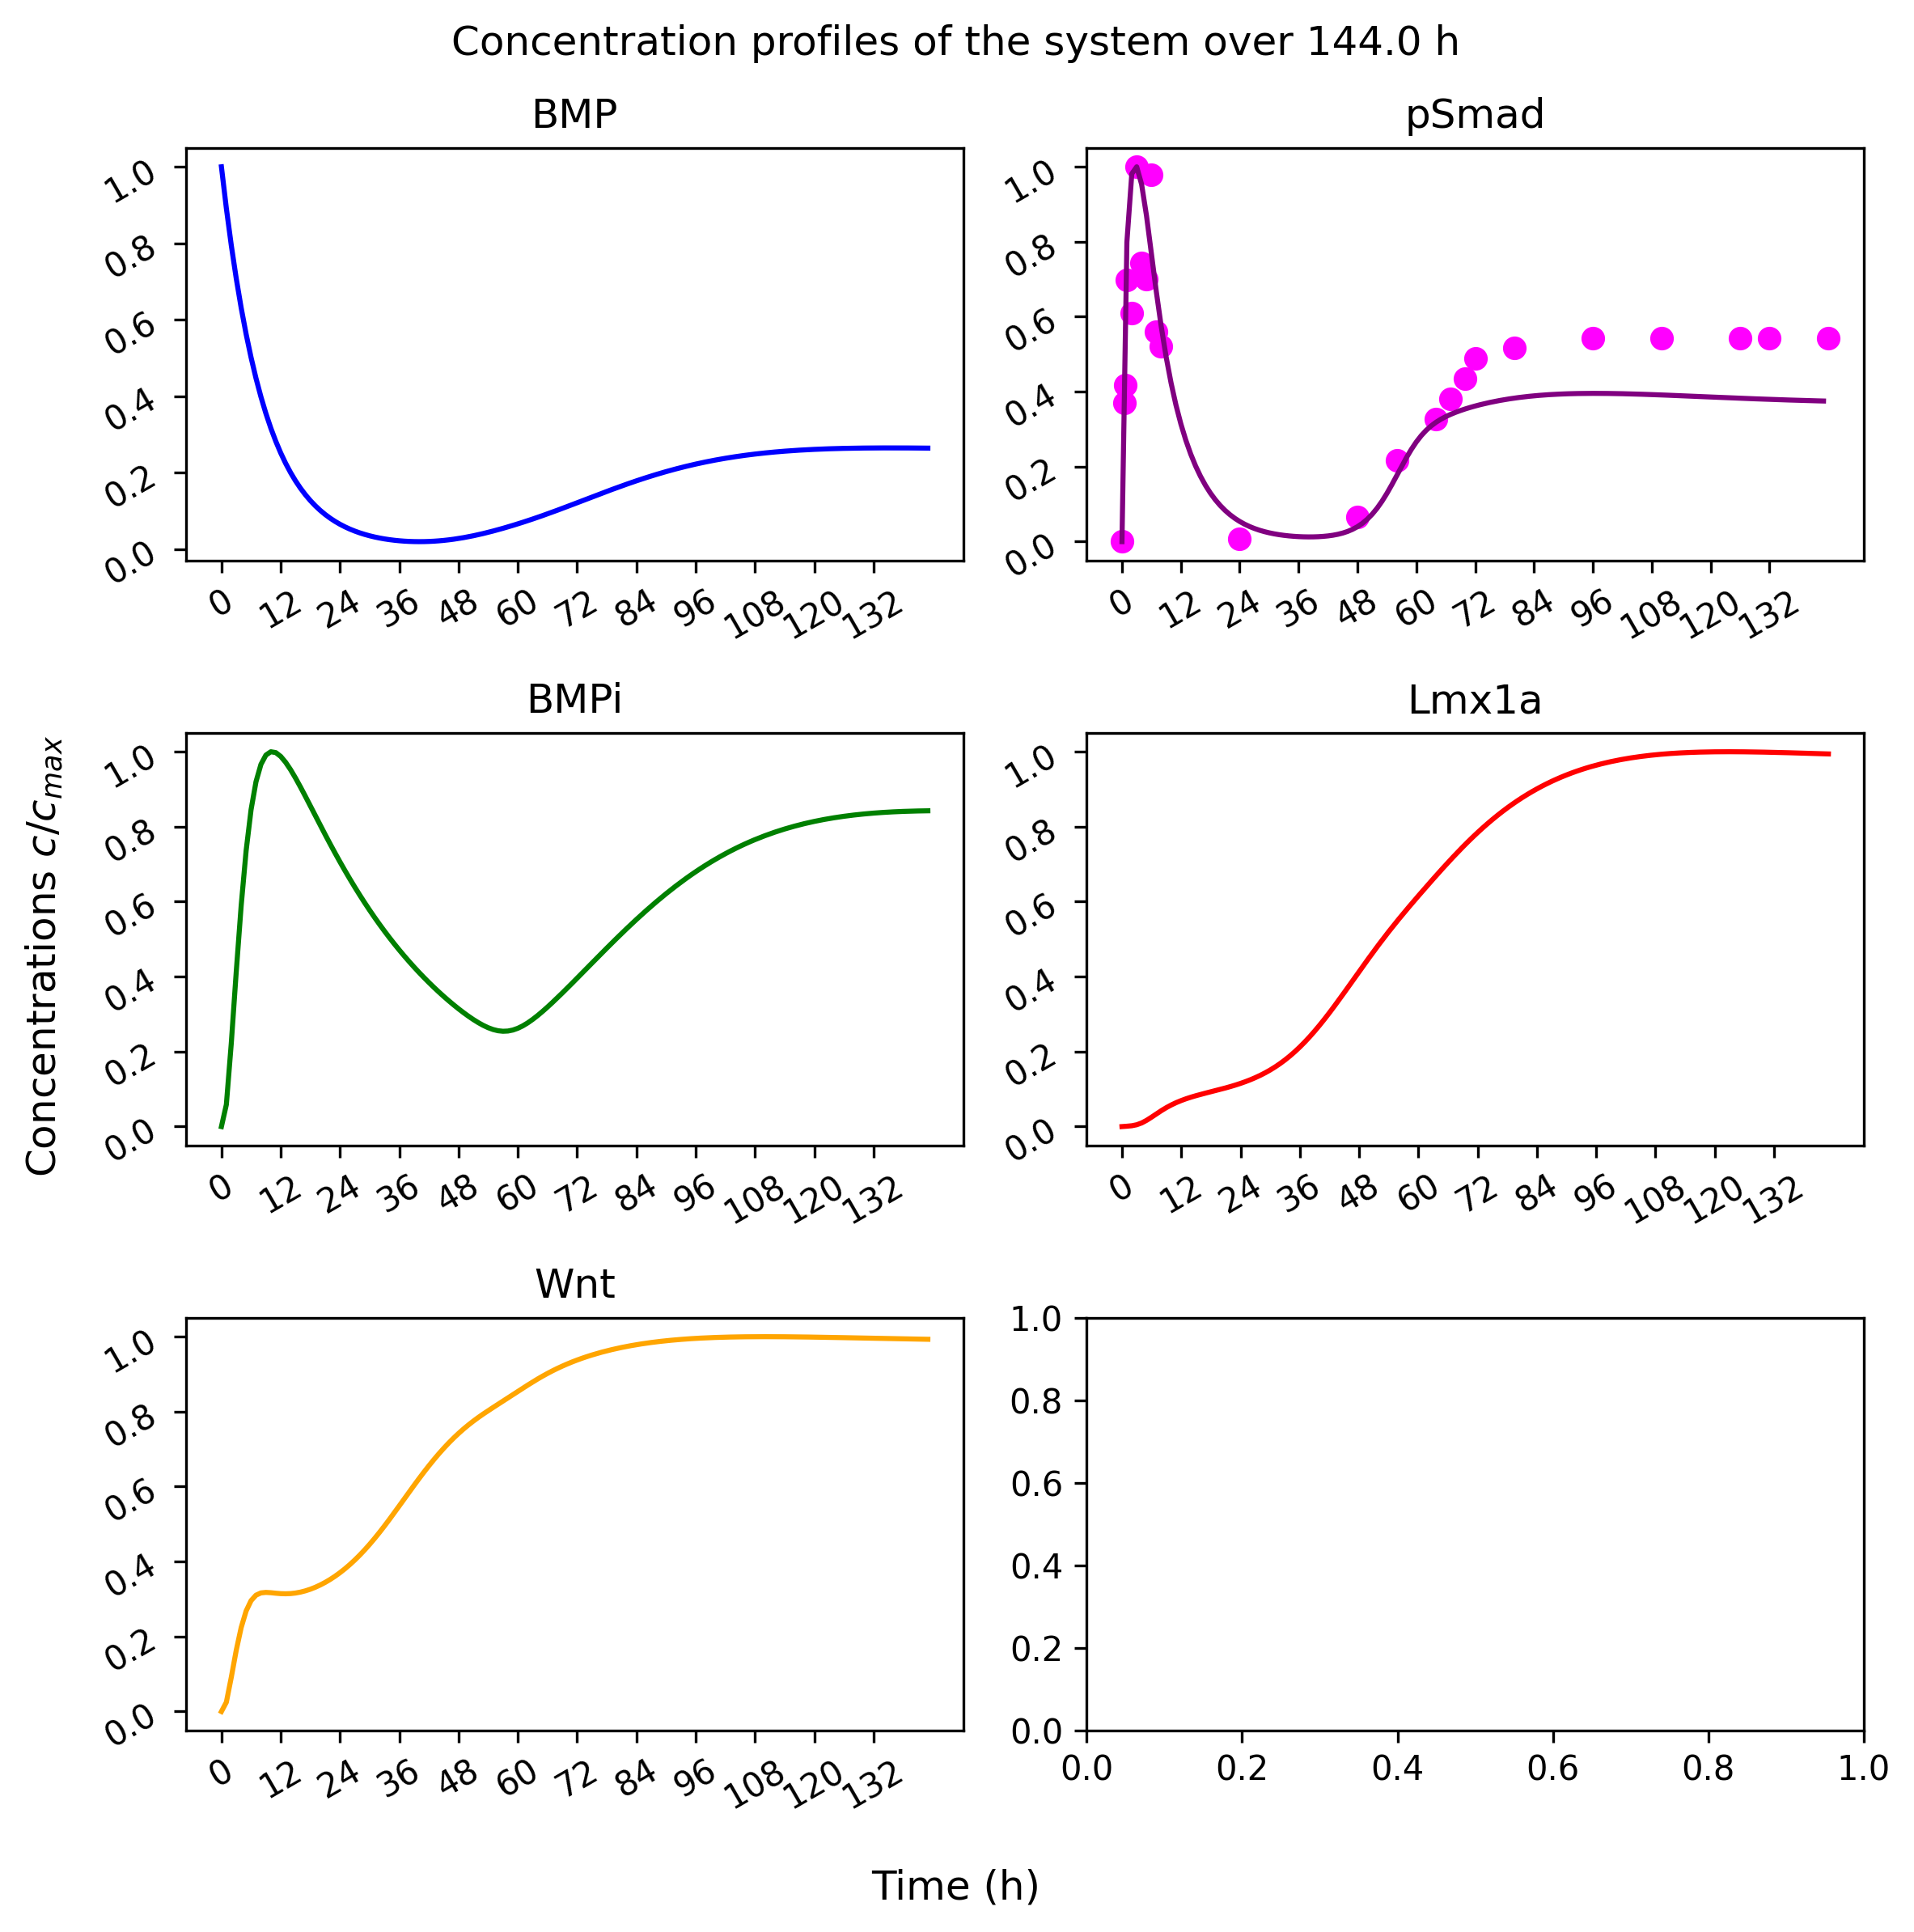

In [43]:
# Plot all the conncs as a function of time over one axis from the center
fig, axes = plt.subplots(3, 2, figsize=(8, 8), dpi=300)
b_concs_t = data_b_time/np.max(data_b_time)
i_concs_t = data_i_time/np.max(data_i_time)
s_concs_t = data_s_time/np.max(data_s_time)
l_concs_t = data_l_time/np.max(data_l_time)
w_concs_t = data_w_time/np.max(data_w_time)

delta_T = data_b_time.shape[0]

axes[0,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], b_concs_t, color = "Blue")
axes[0,0].set_xticks(np.arange(0, delta_T, 12))
axes[0,0].tick_params(axis='both', which='major', labelsize=10, rotation=30)
axes[0,0].set_title("BMP")

axes[1,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], i_concs_t, color = "Green")
axes[1,0].set_xticks(np.arange(0, delta_T, 12))
axes[1,0].tick_params(axis='both', which='major', labelsize=10, rotation=30)
axes[1,0].set_title("BMPi")

axes[0,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], s_concs_t, color = "Purple")
axes[0,1].scatter(t_measured, x2_measured, color = "magenta")
axes[0,1].set_xticks(np.arange(0, delta_T, 12))
axes[0,1].tick_params(axis='both', which='major', labelsize=10, rotation=30)
axes[0,1].set_title("pSmad")

axes[1,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], l_concs_t, color = "Red")
axes[1,1].set_xticks(np.arange(0, delta_T, 12))
axes[1,1].tick_params(axis='both', which='major', labelsize=10, rotation=30)
axes[1,1].set_title("Lmx1a")

axes[2,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], w_concs_t, color = "orange")
axes[2,0].set_xticks(np.arange(0, delta_T, 12))
axes[2,0].tick_params(axis='both', which='major', labelsize=10, rotation=30)
axes[2,0].set_title("Wnt")
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the system over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();

In [7]:
for a_b_s in [0.1, 0.25, 0.5, 1, 1.5, 2]:
    for K_b_s in [0.05, 0.1, 0.2, 0.5]:
        for a_i_s in [0.1, 0.25, 0.5, 1, 1.5, 2]:
            for K_i_s in [0.05, 0.1, 0.2, 0.5]:
                for a_s_b in [0.1, 0.25, 0.5, 1, 1.5, 2]:
                    for K_s_b in [0.05, 0.1, 0.2, 0.5]:
                        for K_s_i in [0.05, 0.1, 0.2, 0.5]:
                            for d_b in [0.1, 0.25, 0.5, 0.75, 1]:
                                for d_i in [0.1, 0.25, 0.5, 0.75, 1]:
                                    b_params[0] = a_b_s
                                    b_params[1] = K_b_s**sys_params[0]
                                    b_params[2] = d_b 

                                    i_params[0] = a_i_s
                                    i_params[1] = K_i_s**sys_params[0]
                                    i_params[2] = d_i

                                    s_params[0] = a_s_b
                                    s_params[1] = K_s_b**sys_params[0]
                                    s_params[2] = K_s_i**sys_params[0]

                                    # Get the initial conditions
                                    b, i, s = create_IC_1(sys_params)

                                    data_b_time, data_i_time, data_s_time = run_and_save_sys(b, i, s, 
                                                         b_params, i_params, s_params,
                                                         sys_params, sol_params)
                                    
                                    # Plot all the conncs as a function of time over one axis from the center
                                    fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)
                                    b_concs_t = data_b_time/np.max(data_b_time)
                                    i_concs_t = data_i_time/np.max(data_i_time)
                                    s_concs_t = data_s_time/np.max(data_s_time)

                                    delta_T = data_b_time.shape[0]
                                    axes[0,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], b_concs_t, color = "Blue")
                                    axes[0,0].set_title("BMP")
                                    axes[1,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], i_concs_t, color = "Green")
                                    axes[1,0].set_title("BMPi")
                                    axes[0,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], s_concs_t, color = "Purple")
                                    axes[0,1].set_title("pSmad")
                                    fig.supylabel(r'Concentrations $c/c_{max}$')
                                    fig.supxlabel('Time (h)')
                                    plt.suptitle("Concentration profiles of the system over {} h".format(sol_params[1]*sol_params[0]))
                                    plt.savefig("NoGrowth_GRN/Conc_end_time_abs_{}_Kbs_{}_db_{}_ais_{}_Kis_{}_di_{}_asb_{}_Ksb_{}_Ksi_{}_ds_{}.jpeg".format(
                                        a_b_s, K_b_s, d_b, a_i_s, K_i_s, d_i, a_s_b, K_s_b, K_s_i, s_params[3]
                                    ), 
                                                dpi=600)
                                    plt.close(1);

ValueError: too many values to unpack (expected 3)